In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Loading Datasets

In [2]:
auction = pd.read_csv("C:/Users/23MSP3017/Downloads/IPL IMB381IPL2013 (1).csv")
batsmen = pd.read_excel("C:/Users/23MSP3017/Downloads/Top_100_batsman (1).xlsx")
bowlers = pd.read_excel("C:/Users/23MSP3017/Downloads/Top_100_bowlers.xlsx")

In [3]:
auction.head()

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,...,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,...,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,...,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000


In [4]:
batsmen.head()

,POS,PLAYER,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,1,ViratKohli,177,169,26,5412,113,37.84,4112,131.61,5,36,480,190
1,2,Suresh Raina,193,189,28,5368,100*,33.34,3914,137.14,1,38,493,194
2,3,Rohit Sharma,188,183,28,4898,109*,31.60,3744,130.82,1,36,431,194
3,4,David Warner,126,126,17,4706,126,43.17,3305,142.39,4,44,458,181
4,5,Shikhar Dhawan,159,158,21,4579,97*,33.42,3669,124.80,0,37,524,96


In [5]:
bowlers.head()

,POS,PLAYER,Mat,Inns,Ov,Runs,Wkts,BBI,Avg,Econ,SR,4w,5w
0,1,LasithMalinga,122,122,471.1,3366,170,0,19.80,7.14,16.62,6,1
1,2,Amit Mishra,147,147,516.5,3799,157,0,24.19,7.35,19.75,3,1
2,3,Harbhajan Singh,160,157,562.2,3967,150,0,26.44,7.05,22.49,1,1
3,4,Piyush Chawla,157,156,520.4,4072,150,0,27.14,7.82,20.82,2,0
4,5,Dwayne Bravo,134,131,431.0,3617,147,0,24.60,8.39,17.59,2,0


# Data pre-processing

In [6]:
auction

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,...,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,...,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,...,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,126,"Yadav, AS",2,IND,DC,Batsman,0,0,0,0.00,...,125.64,2,0,0,0.00,0.00,0.00,2010,50000,750000
126,127,Younis Khan,2,PAK,RR,Batsman,6398,7,6814,75.78,...,42.85,0,0,0,0.00,0.00,0.00,2008,225000,225000
127,128,Yuvraj Singh,2,IND,KXIP+,Batsman,1775,9,8051,87.58,...,131.88,67,569,23,24.74,7.02,21.13,2011,400000,1800000
128,129,Zaheer Khan,2,IND,MI+,Bowler,1114,288,790,73.55,...,91.67,1,1783,65,27.43,7.75,21.26,2008,200000,450000


In [8]:
auction.isnull().sum()

Sl.NO.           0
PLAYER NAME      0
AGE              0
COUNTRY          0
TEAM             0
PLAYING ROLE     0
T-RUNS           0
T-WKTS           0
ODI-RUNS-S       0
ODI-SR-B         0
ODI-WKTS         0
ODI-SR-BL        0
CAPTAINCY EXP    0
RUNS-S           0
HS               0
AVE              0
SR-B             0
SIXERS           0
RUNS-C           0
WKTS             0
AVE-BL           0
ECON             0
SR-BL            0
AUCTION YEAR     0
BASE PRICE       0
SOLD PRICE       0
dtype: int64

In [9]:
batsmen

,POS,PLAYER,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,1,ViratKohli,177,169,26,5412,113,37.84,4112,131.61,5,36,480,190
1,2,Suresh Raina,193,189,28,5368,100*,33.34,3914,137.14,1,38,493,194
2,3,Rohit Sharma,188,183,28,4898,109*,31.60,3744,130.82,1,36,431,194
3,4,David Warner,126,126,17,4706,126,43.17,3305,142.39,4,44,458,181
4,5,Shikhar Dhawan,159,158,21,4579,97*,33.42,3669,124.80,0,37,524,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Piyush Chawla,157,81,32,584,24*,11.91,524,111.45,0,0,54,18
96,97,Hashim Amla,16,16,3,577,104*,44.38,407,141.76,2,3,60,21
97,98,Vijay Shankar,33,29,11,557,63*,30.94,416,133.89,0,2,34,24
98,99,Corey Anderson,30,29,7,538,95*,24.45,423,127.18,0,3,40,31


In [10]:
batsmen.isnull().sum()

POS       0
PLAYER    0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Avg       0
BF        0
SR        0
100       0
50        0
4s        0
6s        0
dtype: int64

In [11]:
bowlers

,POS,PLAYER,Mat,Inns,Ov,Runs,Wkts,BBI,Avg,Econ,SR,4w,5w
0,1,LasithMalinga,122,122,471.1,3366,170,0,19.80,7.14,16.62,6,1
1,2,Amit Mishra,147,147,516.5,3799,157,0,24.19,7.35,19.75,3,1
2,3,Harbhajan Singh,160,157,562.2,3967,150,0,26.44,7.05,22.49,1,1
3,4,Piyush Chawla,157,156,520.4,4072,150,0,27.14,7.82,20.82,2,0
4,5,Dwayne Bravo,134,131,431.0,3617,147,0,24.60,8.39,17.59,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Dwayne Smith,91,46,89.5,810,26,0,31.15,9.01,20.73,1,0
96,97,Johan Botha,34,34,115.4,800,25,0,32.00,6.91,27.76,0,0
97,98,Suresh Raina,193,69,151.2,1118,25,0,44.72,7.38,36.32,0,0
98,99,Brett Lee,38,38,145.5,1095,25,0,43.80,7.50,35.00,0,0


In [12]:
bowlers.isnull().sum()

POS       0
PLAYER    0
Mat       0
Inns      0
Ov        0
Runs      0
Wkts      0
BBI       0
Avg       0
Econ      0
SR        0
4w        0
5w        0
dtype: int64

In [3]:
auction = auction.drop(['Sl.NO.','AGE','COUNTRY','TEAM','T-RUNS','T-WKTS','ODI-RUNS-S','ODI-SR-B','ODI-WKTS','ODI-SR-BL','SIXERS','AUCTION YEAR'],axis=1)

In [14]:
auction

,PLAYER NAME,PLAYING ROLE,CAPTAINCY EXP,RUNS-S,HS,AVE,SR-B,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,BASE PRICE,SOLD PRICE
0,"Abdulla, YA",Allrounder,0,0,0,0.00,0.00,307,15,20.47,8.90,13.93,50000,50000
1,Abdur Razzak,Bowler,0,0,0,0.00,0.00,29,0,0.00,14.50,0.00,50000,50000
2,"Agarkar, AB",Bowler,0,167,39,18.56,121.01,1059,29,36.52,8.81,24.90,200000,350000
3,"Ashwin, R",Bowler,0,58,11,5.80,76.32,1125,49,22.96,6.23,22.14,100000,850000
4,"Badrinath, S",Batsman,0,1317,71,32.93,120.71,0,0,0.00,0.00,0.00,100000,800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,"Yadav, AS",Batsman,0,49,16,9.80,125.64,0,0,0.00,0.00,0.00,50000,750000
126,Younis Khan,Batsman,1,3,3,3.00,42.85,0,0,0.00,0.00,0.00,225000,225000
127,Yuvraj Singh,Batsman,1,1237,66,26.32,131.88,569,23,24.74,7.02,21.13,400000,1800000
128,Zaheer Khan,Bowler,0,99,23,9.90,91.67,1783,65,27.43,7.75,21.26,200000,450000


In [4]:
from sklearn.preprocessing import RobustScaler


scaler = RobustScaler()

# Fit and transform the columns
columns_to_scale = ['BASE PRICE', 'SOLD PRICE']
auction[columns_to_scale] = scaler.fit_transform(auction[columns_to_scale])


print(auction)


      PLAYER NAME PLAYING ROLE  CAPTAINCY EXP  RUNS-S  HS    AVE    SR-B  \
0     Abdulla, YA   Allrounder              0       0   0   0.00    0.00   
1    Abdur Razzak       Bowler              0       0   0   0.00    0.00   
2     Agarkar, AB       Bowler              0     167  39  18.56  121.01   
3       Ashwin, R       Bowler              0      58  11   5.80   76.32   
4    Badrinath, S      Batsman              0    1317  71  32.93  120.71   
..            ...          ...            ...     ...  ..    ...     ...   
125     Yadav, AS      Batsman              0      49  16   9.80  125.64   
126   Younis Khan      Batsman              1       3   3   3.00   42.85   
127  Yuvraj Singh      Batsman              1    1237  66  26.32  131.88   
128   Zaheer Khan       Bowler              0      99  23   9.90   91.67   
129    Zoysa, DNT       Bowler              0      11  10  11.00  122.22   

     RUNS-C  WKTS  AVE-BL   ECON  SR-BL  BASE PRICE  SOLD PRICE  
0       307    15   2

In [17]:
auction

,PLAYER NAME,PLAYING ROLE,CAPTAINCY EXP,RUNS-S,HS,AVE,SR-B,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,BASE PRICE,SOLD PRICE
0,"Abdulla, YA",Allrounder,0,0,0,0.00,0.00,307,15,20.47,8.90,13.93,-1.2,-0.815789
1,Abdur Razzak,Bowler,0,0,0,0.00,0.00,29,0,0.00,14.50,0.00,-1.2,-0.815789
2,"Agarkar, AB",Bowler,0,167,39,18.56,121.01,1059,29,36.52,8.81,24.90,0.0,-0.184211
3,"Ashwin, R",Bowler,0,58,11,5.80,76.32,1125,49,22.96,6.23,22.14,-0.8,0.868421
4,"Badrinath, S",Batsman,0,1317,71,32.93,120.71,0,0,0.00,0.00,0.00,-0.8,0.763158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,"Yadav, AS",Batsman,0,49,16,9.80,125.64,0,0,0.00,0.00,0.00,-1.2,0.657895
126,Younis Khan,Batsman,1,3,3,3.00,42.85,0,0,0.00,0.00,0.00,0.2,-0.447368
127,Yuvraj Singh,Batsman,1,1237,66,26.32,131.88,569,23,24.74,7.02,21.13,1.6,2.868421
128,Zaheer Khan,Bowler,0,99,23,9.90,91.67,1783,65,27.43,7.75,21.26,0.0,0.026316


# Visualization

In [18]:
top_10 = auction.sort_values('SOLD PRICE',ascending = False).head(10)
top_10

,PLAYER NAME,PLAYING ROLE,CAPTAINCY EXP,RUNS-S,HS,AVE,SR-B,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,BASE PRICE,SOLD PRICE
93,"Sehwag, V",Batsman,1,1879,119,30.31,167.32,226,6,37.67,10.56,21.67,1.6,2.868421
127,Yuvraj Singh,Batsman,1,1237,66,26.32,131.88,569,23,24.74,7.02,21.13,1.6,2.868421
50,"Kohli, V",Batsman,1,1639,73,28.26,119.29,345,4,86.25,8.84,58.50,-0.4,2.868421
111,"Tendulkar, SR",Batsman,1,2047,100,37.91,119.22,58,0,0.00,9.67,0.00,1.6,2.868421
113,"Tiwary, SS",Batsman,0,836,42,25.33,119.60,0,0,0.00,0.00,0.00,-0.8,2.447368
83,"Pietersen, KP",Batsman,1,634,103,42.27,141.20,215,7,30.71,7.41,24.86,9.2,2.342105
23,"Flintoff, A",Allrounder,1,62,24,31.00,116.98,105,2,52.50,9.55,33.00,6.0,2.342105
15,"Dhoni, MS",W. Keeper,1,1782,70,37.13,136.45,0,0,0.00,0.00,0.00,1.6,2.236842
108,"Symonds, A",Allrounder,0,974,117,36.07,129.87,674,20,33.70,7.70,26.35,0.4,1.921053
110,"Taylor, LRPL",Batsman,1,895,81,27.97,130.28,24,0,0.00,12.00,0.00,1.6,1.184211


Checking for outliers

C:\Users\balak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\balak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\balak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\balak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

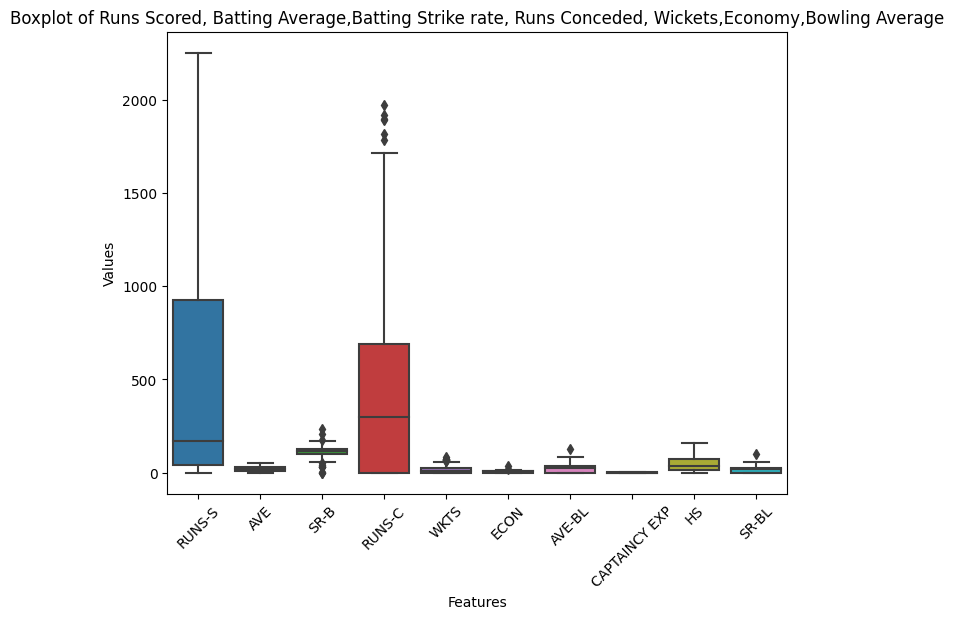

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.boxplot(data=auction[['RUNS-S', 'AVE','SR-B', 'RUNS-C','WKTS','ECON','AVE-BL','CAPTAINCY EXP','HS','SR-BL']])
plt.title('Boxplot of Runs Scored, Batting Average,Batting Strike rate, Runs Conceded, Wickets,Economy,Bowling Average')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.show()


In [5]:
import pandas as pd

column_data = auction['SR-B']

Q1 = column_data.quantile(0.25)
Q3 = column_data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_index = column_data[(column_data < lower_bound) | (column_data > upper_bound)].index
cleaned_data = auction.drop(outliers_index)

cleaned_data


,PLAYER NAME,PLAYING ROLE,CAPTAINCY EXP,RUNS-S,HS,AVE,SR-B,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,BASE PRICE,SOLD PRICE
2,"Agarkar, AB",Bowler,0,167,39,18.56,121.01,1059,29,36.52,8.81,24.90,0.0,-0.184211
3,"Ashwin, R",Bowler,0,58,11,5.80,76.32,1125,49,22.96,6.23,22.14,-0.8,0.868421
4,"Badrinath, S",Batsman,0,1317,71,32.93,120.71,0,0,0.00,0.00,0.00,-0.8,0.763158
5,"Bailey, GJ",Batsman,1,63,48,21.00,95.45,0,0,0.00,0.00,0.00,-1.2,-0.815789
6,"Balaji, L",Bowler,0,26,15,4.33,72.22,1342,52,25.81,7.98,19.40,-0.8,0.131579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,"White, CL",Batsman,1,745,78,31.04,132.09,70,0,0.00,14.00,0.00,-0.8,0.131579
125,"Yadav, AS",Batsman,0,49,16,9.80,125.64,0,0,0.00,0.00,0.00,-1.2,0.657895
127,Yuvraj Singh,Batsman,1,1237,66,26.32,131.88,569,23,24.74,7.02,21.13,1.6,2.868421
128,Zaheer Khan,Bowler,0,99,23,9.90,91.67,1783,65,27.43,7.75,21.26,0.0,0.026316


In [6]:
import pandas as pd

column_data = cleaned_data['RUNS-C']

Q1 = column_data.quantile(0.25)
Q3 = column_data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_index = column_data[(column_data < lower_bound) | (column_data > upper_bound)].index
cleaned_data = cleaned_data.drop(outliers_index)

cleaned_data


,PLAYER NAME,PLAYING ROLE,CAPTAINCY EXP,RUNS-S,HS,AVE,SR-B,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,BASE PRICE,SOLD PRICE
2,"Agarkar, AB",Bowler,0,167,39,18.56,121.01,1059,29,36.52,8.81,24.90,0.0,-0.184211
3,"Ashwin, R",Bowler,0,58,11,5.80,76.32,1125,49,22.96,6.23,22.14,-0.8,0.868421
4,"Badrinath, S",Batsman,0,1317,71,32.93,120.71,0,0,0.00,0.00,0.00,-0.8,0.763158
5,"Bailey, GJ",Batsman,1,63,48,21.00,95.45,0,0,0.00,0.00,0.00,-1.2,-0.815789
6,"Balaji, L",Bowler,0,26,15,4.33,72.22,1342,52,25.81,7.98,19.40,-0.8,0.131579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,"Warner, DA",Batsman,0,1025,109,27.70,135.76,0,0,0.00,0.00,0.00,0.0,0.657895
124,"White, CL",Batsman,1,745,78,31.04,132.09,70,0,0.00,14.00,0.00,-0.8,0.131579
125,"Yadav, AS",Batsman,0,49,16,9.80,125.64,0,0,0.00,0.00,0.00,-1.2,0.657895
127,Yuvraj Singh,Batsman,1,1237,66,26.32,131.88,569,23,24.74,7.02,21.13,1.6,2.868421


In [7]:
import pandas as pd

column_data = cleaned_data['WKTS']

Q1 = column_data.quantile(0.25)
Q3 = column_data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_index = column_data[(column_data < lower_bound) | (column_data > upper_bound)].index
cleaned_data = cleaned_data.drop(outliers_index)

cleaned_data


,PLAYER NAME,PLAYING ROLE,CAPTAINCY EXP,RUNS-S,HS,AVE,SR-B,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,BASE PRICE,SOLD PRICE
2,"Agarkar, AB",Bowler,0,167,39,18.56,121.01,1059,29,36.52,8.81,24.90,0.0,-0.184211
3,"Ashwin, R",Bowler,0,58,11,5.80,76.32,1125,49,22.96,6.23,22.14,-0.8,0.868421
4,"Badrinath, S",Batsman,0,1317,71,32.93,120.71,0,0,0.00,0.00,0.00,-0.8,0.763158
5,"Bailey, GJ",Batsman,1,63,48,21.00,95.45,0,0,0.00,0.00,0.00,-1.2,-0.815789
7,"Bollinger, DE",Bowler,0,21,16,21.00,165.88,693,37,18.73,7.22,15.57,0.0,0.552632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,"Warner, DA",Batsman,0,1025,109,27.70,135.76,0,0,0.00,0.00,0.00,0.0,0.657895
124,"White, CL",Batsman,1,745,78,31.04,132.09,70,0,0.00,14.00,0.00,-0.8,0.131579
125,"Yadav, AS",Batsman,0,49,16,9.80,125.64,0,0,0.00,0.00,0.00,-1.2,0.657895
127,Yuvraj Singh,Batsman,1,1237,66,26.32,131.88,569,23,24.74,7.02,21.13,1.6,2.868421


In [8]:
import pandas as pd

column_data = cleaned_data['ECON']

Q1 = column_data.quantile(0.25)
Q3 = column_data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_index = column_data[(column_data < lower_bound) | (column_data > upper_bound)].index
cleaned_data = cleaned_data.drop(outliers_index)

cleaned_data


,PLAYER NAME,PLAYING ROLE,CAPTAINCY EXP,RUNS-S,HS,AVE,SR-B,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,BASE PRICE,SOLD PRICE
2,"Agarkar, AB",Bowler,0,167,39,18.56,121.01,1059,29,36.52,8.81,24.90,0.0,-0.184211
3,"Ashwin, R",Bowler,0,58,11,5.80,76.32,1125,49,22.96,6.23,22.14,-0.8,0.868421
4,"Badrinath, S",Batsman,0,1317,71,32.93,120.71,0,0,0.00,0.00,0.00,-0.8,0.763158
5,"Bailey, GJ",Batsman,1,63,48,21.00,95.45,0,0,0.00,0.00,0.00,-1.2,-0.815789
7,"Bollinger, DE",Bowler,0,21,16,21.00,165.88,693,37,18.73,7.22,15.57,0.0,0.552632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,"Warner, DA",Batsman,0,1025,109,27.70,135.76,0,0,0.00,0.00,0.00,0.0,0.657895
124,"White, CL",Batsman,1,745,78,31.04,132.09,70,0,0.00,14.00,0.00,-0.8,0.131579
125,"Yadav, AS",Batsman,0,49,16,9.80,125.64,0,0,0.00,0.00,0.00,-1.2,0.657895
127,Yuvraj Singh,Batsman,1,1237,66,26.32,131.88,569,23,24.74,7.02,21.13,1.6,2.868421


In [9]:
column_data = cleaned_data['AVE-BL']

Q1 = column_data.quantile(0.25)
Q3 = column_data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_index = column_data[(column_data < lower_bound) | (column_data > upper_bound)].index
cleaned_data = cleaned_data.drop(outliers_index)

cleaned_data


,PLAYER NAME,PLAYING ROLE,CAPTAINCY EXP,RUNS-S,HS,AVE,SR-B,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,BASE PRICE,SOLD PRICE
2,"Agarkar, AB",Bowler,0,167,39,18.56,121.01,1059,29,36.52,8.81,24.90,0.0,-0.184211
3,"Ashwin, R",Bowler,0,58,11,5.80,76.32,1125,49,22.96,6.23,22.14,-0.8,0.868421
4,"Badrinath, S",Batsman,0,1317,71,32.93,120.71,0,0,0.00,0.00,0.00,-0.8,0.763158
5,"Bailey, GJ",Batsman,1,63,48,21.00,95.45,0,0,0.00,0.00,0.00,-1.2,-0.815789
7,"Bollinger, DE",Bowler,0,21,16,21.00,165.88,693,37,18.73,7.22,15.57,0.0,0.552632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,"Warner, DA",Batsman,0,1025,109,27.70,135.76,0,0,0.00,0.00,0.00,0.0,0.657895
124,"White, CL",Batsman,1,745,78,31.04,132.09,70,0,0.00,14.00,0.00,-0.8,0.131579
125,"Yadav, AS",Batsman,0,49,16,9.80,125.64,0,0,0.00,0.00,0.00,-1.2,0.657895
127,Yuvraj Singh,Batsman,1,1237,66,26.32,131.88,569,23,24.74,7.02,21.13,1.6,2.868421


In [10]:
column_data = cleaned_data['SR-BL']

Q1 = column_data.quantile(0.25)
Q3 = column_data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_index = column_data[(column_data < lower_bound) | (column_data > upper_bound)].index
cleaned_data = cleaned_data.drop(outliers_index)

cleaned_data


,PLAYER NAME,PLAYING ROLE,CAPTAINCY EXP,RUNS-S,HS,AVE,SR-B,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,BASE PRICE,SOLD PRICE
2,"Agarkar, AB",Bowler,0,167,39,18.56,121.01,1059,29,36.52,8.81,24.90,0.0,-0.184211
3,"Ashwin, R",Bowler,0,58,11,5.80,76.32,1125,49,22.96,6.23,22.14,-0.8,0.868421
4,"Badrinath, S",Batsman,0,1317,71,32.93,120.71,0,0,0.00,0.00,0.00,-0.8,0.763158
5,"Bailey, GJ",Batsman,1,63,48,21.00,95.45,0,0,0.00,0.00,0.00,-1.2,-0.815789
7,"Bollinger, DE",Bowler,0,21,16,21.00,165.88,693,37,18.73,7.22,15.57,0.0,0.552632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,"Warner, DA",Batsman,0,1025,109,27.70,135.76,0,0,0.00,0.00,0.00,0.0,0.657895
124,"White, CL",Batsman,1,745,78,31.04,132.09,70,0,0.00,14.00,0.00,-0.8,0.131579
125,"Yadav, AS",Batsman,0,49,16,9.80,125.64,0,0,0.00,0.00,0.00,-1.2,0.657895
127,Yuvraj Singh,Batsman,1,1237,66,26.32,131.88,569,23,24.74,7.02,21.13,1.6,2.868421


C:\Users\balak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\balak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\balak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\balak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

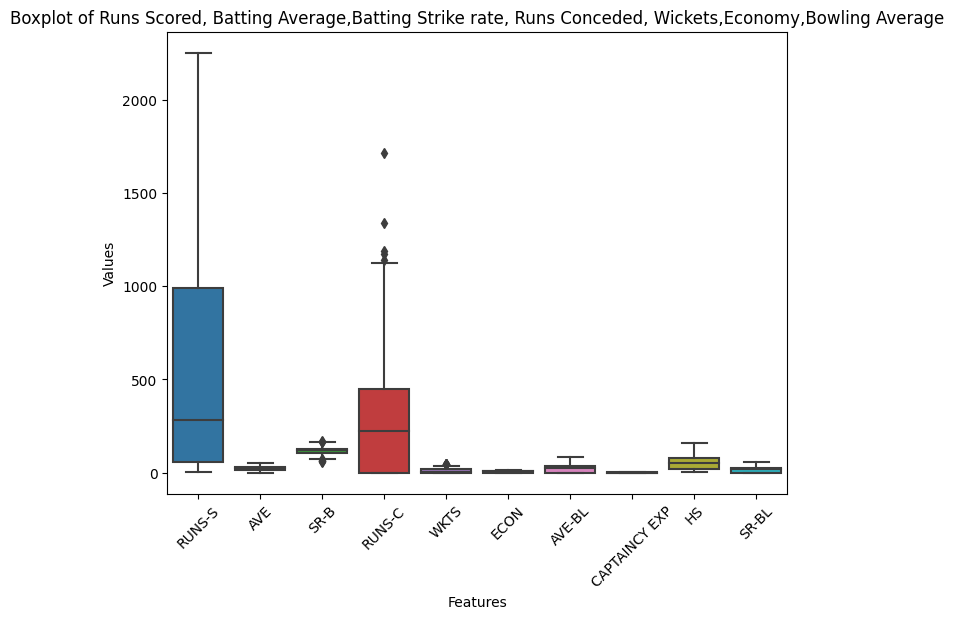

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=cleaned_data[['RUNS-S', 'AVE','SR-B', 'RUNS-C','WKTS','ECON','AVE-BL','CAPTAINCY EXP','HS','SR-BL']])
plt.title('Boxplot of Runs Scored, Batting Average,Batting Strike rate, Runs Conceded, Wickets,Economy,Bowling Average')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.show()

# Most Expensive players in the history of IPL till 2013

<BarContainer object of 10 artists>

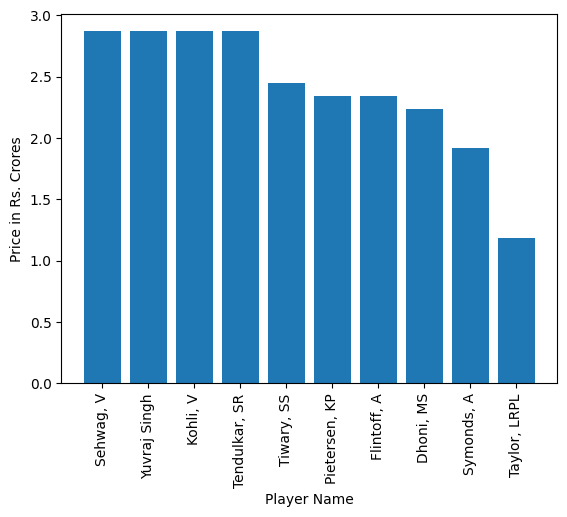

In [27]:
plt.xticks(rotation=90)
plt.xlabel('Player Name')
plt.ylabel('Price in Rs. Crores')
plt.bar(x='PLAYER NAME', height = 'SOLD PRICE',data = top_10)

# Percentage of differenct playing roles who appeared for the Auction till 2013

<AxesSubplot: ylabel='count'>

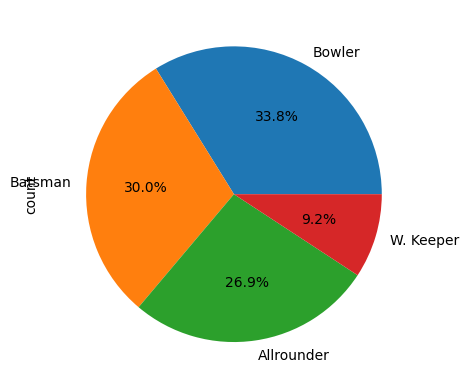

In [28]:
auction['PLAYING ROLE'].value_counts().plot(kind='pie',autopct= '%0.1f%%')

In [29]:
most_runs =batsmen.nlargest(10, ['Runs'])

<AxesSubplot: xlabel='PLAYER', ylabel='Runs'>

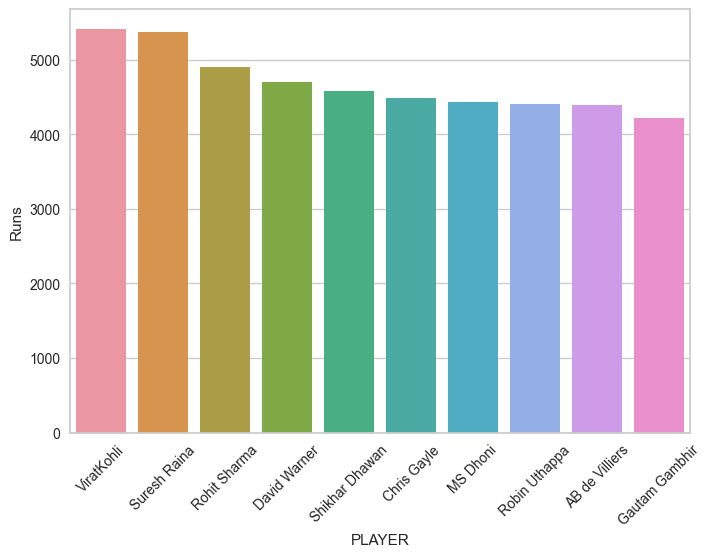

In [20]:
plt.xticks(rotation=45)
sns.barplot(data = most_runs,x='PLAYER',y='Runs')

# Top 10 Batsmen with the highest Average in IPL till 2020

In [31]:
 avg = batsmen.nlargest(10,['Avg'])

Text(0.5, 0, 'Average')

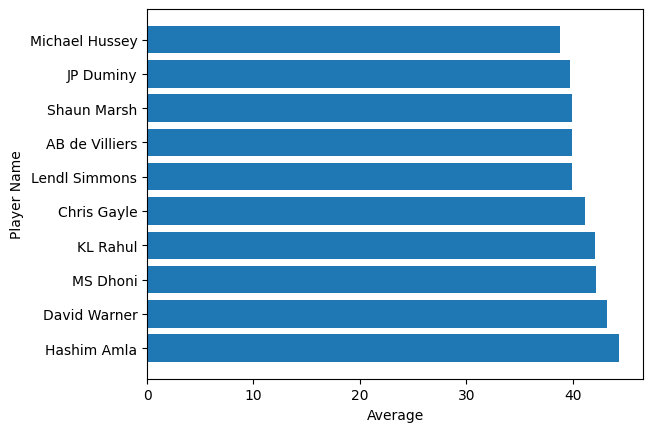

In [32]:
plt.barh(data=avg,y='PLAYER',width='Avg')
plt.ylabel("Player Name")
plt.xlabel('Average')

C:\Users\balak\AppData\Local\Temp\ipykernel_20012\1101319910.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(batsmen.Avg)
C:\Users\balak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\balak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot: xlabel='Avg', ylabel='Density'>

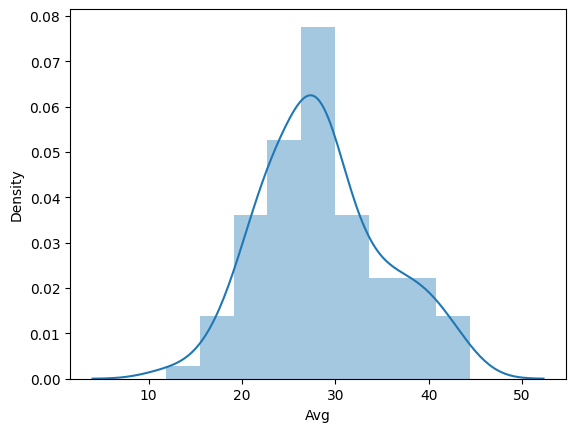

In [33]:
sns.distplot(batsmen.Avg)

# Top 10 Bowlers with most Number of wickets in the IPL till 2020

C:\Users\balak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\balak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\balak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'No. of wickets')

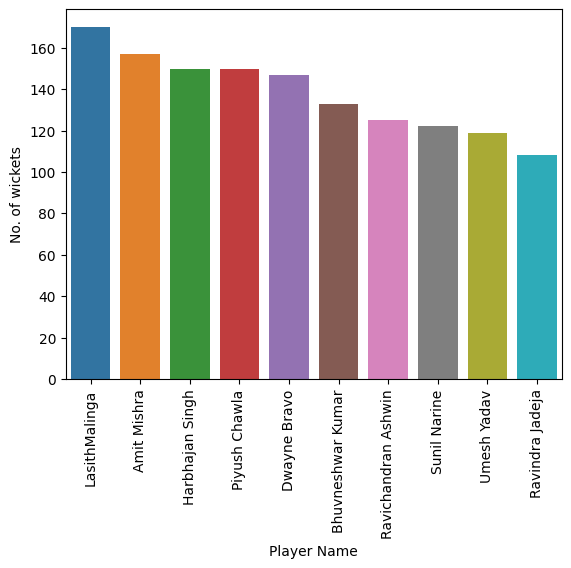

In [34]:
highest_wickets = bowlers.nlargest(10,'Wkts')
sns.barplot(x='PLAYER',y='Wkts',data=highest_wickets)
plt.xticks(rotation=90)
plt.xlabel('Player Name')
plt.ylabel('No. of wickets')

# Top 10 Bowlers with best Bowling Average in the IPL

C:\Users\balak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\balak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\balak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\balak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

Text(0, 0.5, 'Average')

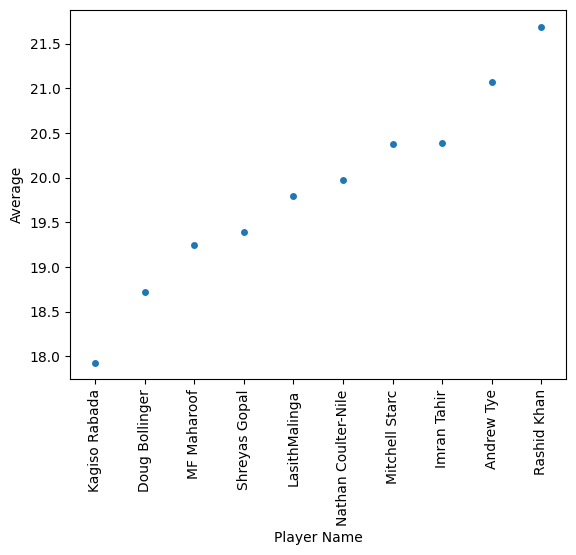

In [35]:
bowler_avg = bowlers.sort_values(by = 'Avg').head(10)
sns.stripplot(x=bowler_avg.PLAYER,y=bowler_avg.Avg)
plt.xticks(rotation=90)
plt.xlabel('Player Name')
plt.ylabel('Average')

# Top 10 Bowlers with most 5 wicket haul in the IPL till 2020

C:\Users\balak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\balak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\balak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'No. of 5 wikcet haul')

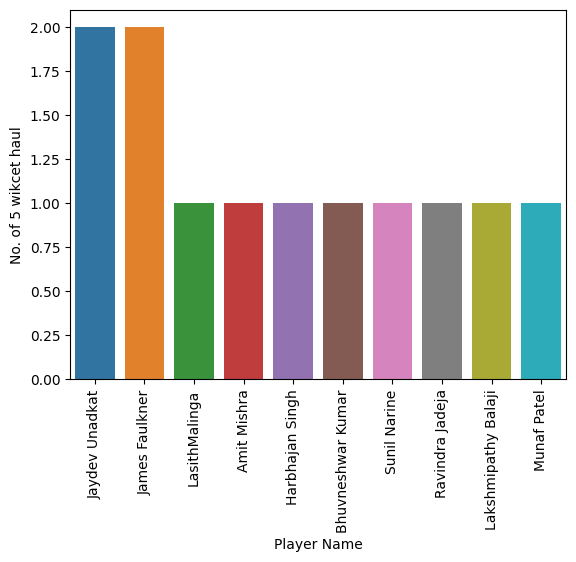

In [36]:
wickets_5 = bowlers.nlargest(10,'5w')
sns.barplot(x='PLAYER', y='5w',data = wickets_5)
plt.xticks(rotation=90)
plt.xlabel('Player Name')
plt.ylabel('No. of 5 wikcet haul')

In [37]:
df = auction.drop(['PLAYER NAME','PLAYING ROLE'],axis=1)
df

,CAPTAINCY EXP,RUNS-S,HS,AVE,SR-B,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,BASE PRICE,SOLD PRICE
0,0,0,0,0.00,0.00,307,15,20.47,8.90,13.93,-1.2,-0.815789
1,0,0,0,0.00,0.00,29,0,0.00,14.50,0.00,-1.2,-0.815789
2,0,167,39,18.56,121.01,1059,29,36.52,8.81,24.90,0.0,-0.184211
3,0,58,11,5.80,76.32,1125,49,22.96,6.23,22.14,-0.8,0.868421
4,0,1317,71,32.93,120.71,0,0,0.00,0.00,0.00,-0.8,0.763158
...,...,...,...,...,...,...,...,...,...,...,...,...
125,0,49,16,9.80,125.64,0,0,0.00,0.00,0.00,-1.2,0.657895
126,1,3,3,3.00,42.85,0,0,0.00,0.00,0.00,0.2,-0.447368
127,1,1237,66,26.32,131.88,569,23,24.74,7.02,21.13,1.6,2.868421
128,0,99,23,9.90,91.67,1783,65,27.43,7.75,21.26,0.0,0.026316


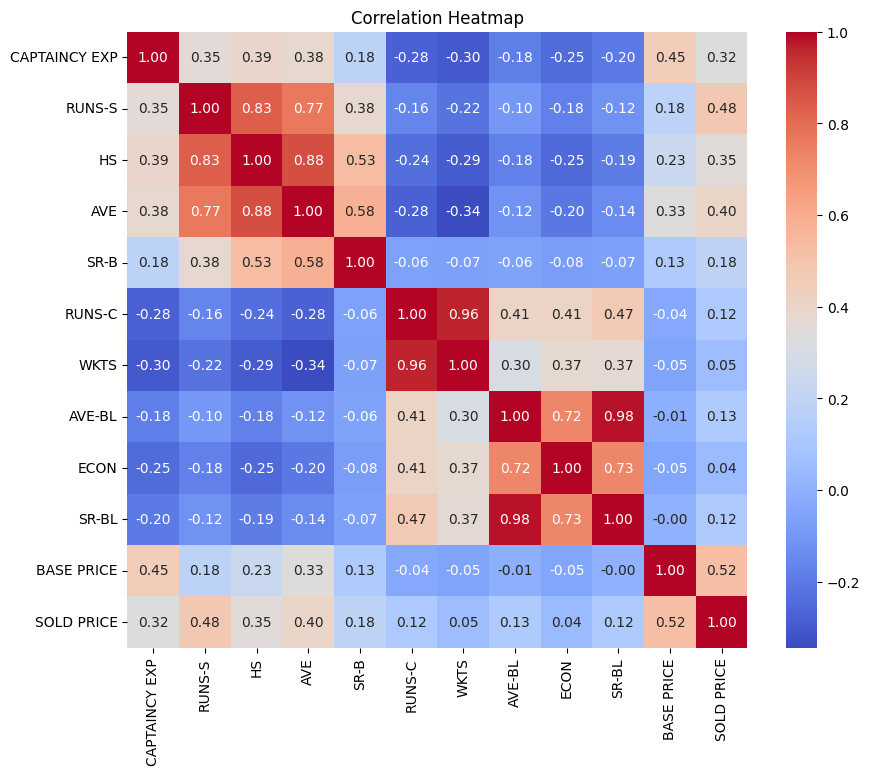

In [38]:

plt.figure(figsize=(10, 8))
corr_matrix = df.corr()  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [11]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display


def display_batsman_details(POS):
    batsman_details = batsmen.iloc[POS - 1]  
    display(batsman_details)  

max_position = len(batsmen)  

slider = widgets.IntSlider(min=1, max=max_position, description='Select Position:', continuous_update=False)

interactive_output = widgets.interactive_output(display_batsman_details, {'POS': slider})

display(widgets.VBox([slider, interactive_output]))


In [12]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display


def display_bowler_details(POS):
    bowler_details = bowlers.iloc[POS - 1]  
    display(bowler_details)  

max_position = len(bowlers)  

slider = widgets.IntSlider(min=1, max=max_position, description='Select Position:', continuous_update=False)

interactive_output = widgets.interactive_output(display_bowler_details, {'POS': slider})

display(widgets.VBox([slider, interactive_output]))


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler

all_rounder_data = cleaned_data[cleaned_data['PLAYING ROLE'] == 'Allrounder']

# Define features and target for batsman model
all_rounder_features = ['RUNS-S', 'AVE', 'SR-B','RUNS-C','WKTS','ECON','SR-BL','AVE-BL']
all_rounder_target = 'SOLD PRICE'

X_train_all_rounder, X_test_all_rounder, y_train_all_rounder, y_test_all_rounder = train_test_split(
    all_rounder_data[all_rounder_features], all_rounder_data[all_rounder_target], test_size=0.2,train_size=0.8, random_state=42
)

# Initialize and train the Multiple Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_all_rounder, y_train_all_rounder)

# Make predictions on the test set
predictions_lr = lr_model.predict(X_test_all_rounder)

# Calculate Mean Squared Error for Linear Regression model
mse_lr_allrounder = mean_squared_error(y_test_all_rounder, predictions_lr)
print(f"Multiple Linear Regression Model Mean Squared Error: {mse_lr_allrounder}")


new_player_features = [300, 45, 130,250,30,7,20,24]  # Replace these values with the new player's data

# Reshape the input data to match the model's requirements
new_player_features_reshaped = np.array(new_player_features).reshape(1, -1)

# Predict the 'SOLD PRICE' for the new player
predicted_price_scaled = lr_model.predict(new_player_features_reshaped)

# Inverse transform the predicted 'SOLD PRICE' to the original scale
predicted_price_original = scaler.inverse_transform([[0, predicted_price_scaled[0]]])[0][1]

print(f"Predicted 'SOLD PRICE' for allrounder: {predicted_price_original}")

Multiple Linear Regression Model Mean Squared Error: 0.7967639353119917
Predicted 'SOLD PRICE' for allrounder: 662686.4862180458


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

batsman_data = cleaned_data[cleaned_data['PLAYING ROLE'] == 'Batsman']

# Define features and target for batsman model
batsman_features = ['RUNS-S', 'AVE', 'SR-B']
batsman_target = 'SOLD PRICE'

# Split data for batsmen
X_train_batsman, X_test_batsman, y_train_batsman, y_test_batsman = train_test_split(
    batsman_data[batsman_features], batsman_data[batsman_target], test_size=0.2, random_state=42
)

# Initialize and train the Multiple Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_batsman, y_train_batsman)

# Make predictions on the test set
predictions_lr = lr_model.predict(X_test_batsman)

# Calculate Mean Squared Error for Linear Regression model
mse_lr_batsman = mean_squared_error(y_test_batsman, predictions_lr)
print(f"Multiple Linear Regression Model Mean Squared Error: {mse_lr_batsman}")

# Example data for a new 'Batsman' player
new_player_features = [300, 45, 130]  # Replace these values with the new player's data

# Reshape the input data to match the model's requirements
new_player_features_reshaped = np.array(new_player_features).reshape(1, -1)

# Predict the 'SOLD PRICE' for the new player
predicted_price_scaled = lr_model.predict(new_player_features_reshaped)

# Inverse transform the predicted 'SOLD PRICE' to the original scale
predicted_price_original = scaler.inverse_transform([[0, predicted_price_scaled[0]]])[0][1]

# Display the predicted price for the new player in both scales
print(f"Predicted 'SOLD PRICE' for Batsman: {predicted_price_original}")


Multiple Linear Regression Model Mean Squared Error: 0.471718726272233
Predicted 'SOLD PRICE' for Batsman: 307454.00165243103


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [15]:

bowler_data = cleaned_data[cleaned_data['PLAYING ROLE'] == 'Bowler']

# Define features and target for batsman model
bowler_features = ['RUNS-C', 'AVE-BL', 'SR-BL','WKTS']
bowler_target = 'SOLD PRICE'

# Split data for batsmen
X_train_bowler, X_test_bowler, y_train_bowler, y_test_bowler = train_test_split(
    bowler_data[bowler_features], bowler_data[bowler_target], test_size=0.2, random_state=42
)

# Initialize and train the Multiple Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_bowler, y_train_bowler)

# Make predictions on the test set
predictions_lr = lr_model.predict(X_test_bowler)

# Calculate Mean Squared Error for Linear Regression model
mse_lr_bowler = mean_squared_error(y_test_bowler, predictions_lr)
print(f"Multiple Linear Regression Model Mean Squared Error: {mse_lr_bowler}")

new_player_features = [500,25,22,21]  # Replace these values with the new player's data

# Reshape the input data to match the model's requirements
new_player_features_reshaped = np.array(new_player_features).reshape(1, -1)

# Predict the 'SOLD PRICE' for the new player
predicted_price_scaled = lr_model.predict(new_player_features_reshaped)

# Inverse transform the predicted 'SOLD PRICE' to the original scale
predicted_price_original = scaler.inverse_transform([[0, predicted_price_scaled[0]]])[0][1]

# Display the predicted price for the new player in both scales
print(f"Predicted 'SOLD PRICE' for Bowler : {predicted_price_original}")


Multiple Linear Regression Model Mean Squared Error: 0.2180657530445222
Predicted 'SOLD PRICE' for Bowler : 365497.19747163495


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [16]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

batsman_data = cleaned_data[cleaned_data['PLAYING ROLE'] == 'Batsman']

# Define features and target for batsman model
batsman_features = ['RUNS-S', 'AVE', 'SR-B']
batsman_target = 'SOLD PRICE'

# Split data for batsmen
X_train_batsman, X_test_batsman, y_train_batsman, y_test_batsman = train_test_split(
    batsman_data[batsman_features], batsman_data[batsman_target], test_size=0.2, random_state=42
)

# Train a model specific to batsmen
batsman_model = RandomForestRegressor(n_estimators=100, random_state=42)
batsman_model.fit(X_train_batsman, y_train_batsman)

# Make predictions on the test set for batsmen
predictions_batsman = batsman_model.predict(X_test_batsman)

# Calculate Mean Squared Error for batsman model
mse_rf_batsman = mean_squared_error(y_test_batsman, predictions_batsman)
print(f"Batsman Model Mean Squared Error: {mse_rf_batsman}")

new_player_features = [300, 45, 130]  # Replace these values with the new player's data

# Reshape the input data to match the model's requirements
new_player_features_reshaped = np.array(new_player_features).reshape(1, -1)

# Predict the 'SOLD PRICE' for the new player
predicted_price_scaled = batsman_model.predict(new_player_features_reshaped)

# Inverse transform the predicted 'SOLD PRICE' to the original scale
predicted_price_original = scaler.inverse_transform([[0, predicted_price_scaled[0]]])[0][1]

# Display the predicted price for the new player in both scales
print(f"Predicted 'SOLD PRICE' for Batsman: {predicted_price_original}")


Batsman Model Mean Squared Error: 0.6465686634349027
Predicted 'SOLD PRICE' for Batsman: 807750.0000000001


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [18]:
bowler_data = cleaned_data[cleaned_data['PLAYING ROLE'] == 'Bowler']

# Define features and target for batsman model
bowler_features = ['RUNS-C', 'AVE-BL', 'SR-BL','WKTS']
bowler_target = 'SOLD PRICE'

# Split data for batsmen
X_train_bowler, X_test_bowler, y_train_bowler, y_test_bowler = train_test_split(
    bowler_data[bowler_features], bowler_data[bowler_target], test_size=0.2, random_state=42
)
# Train a model specific to batsmen
bowler_model = RandomForestRegressor(n_estimators=100, random_state=42)
bowler_model.fit(X_train_bowler, y_train_bowler)

# Make predictions on the test set for batsmen
predictions_bowler = bowler_model.predict(X_test_bowler)

# Calculate Mean Squared Error for batsman model
mse_rf_bowler = mean_squared_error(y_test_bowler, predictions_bowler)
print(f"Batsman Model Mean Squared Error: {mse_rf_bowler}")

new_player_features = [500,25,22,21]  # Replace these values with the new player's data

# Reshape the input data to match the model's requirements
new_player_features_reshaped = np.array(new_player_features).reshape(1, -1)

# Predict the 'SOLD PRICE' for the new player
predicted_price_scaled = bowler_model.predict(new_player_features_reshaped)

# Inverse transform the predicted 'SOLD PRICE' to the original scale
predicted_price_original = scaler.inverse_transform([[0, predicted_price_scaled[0]]])[0][1]

# Display the predicted price for the new player in both scales
print(f"Predicted 'SOLD PRICE' for Bowler : {predicted_price_original}")

Batsman Model Mean Squared Error: 0.2881239002770084
Predicted 'SOLD PRICE' for Bowler : 259059.99999999997


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [19]:
# Filter data for all-rounders
all_rounder_data = cleaned_data[cleaned_data['PLAYING ROLE'] == 'Allrounder']

# Define features and target for all-rounder model
all_rounder_features = ['RUNS-S', 'AVE', 'SR-B','ECON', 
                        'RUNS-C', 'AVE-BL', 'SR-BL','WKTS']
all_rounder_target = 'SOLD PRICE'

# Split data for all-rounders
X_train_all_rounder, X_test_all_rounder, y_train_all_rounder, y_test_all_rounder = train_test_split(
    all_rounder_data[all_rounder_features], all_rounder_data[all_rounder_target], test_size=0.2,train_size=0.8, random_state=42
)

# Train a model specific to all-rounders
all_rounder_model = RandomForestRegressor(n_estimators=100, random_state=42)
all_rounder_model.fit(X_train_all_rounder, y_train_all_rounder)

# Make predictions on the test set for all-rounders
predictions_all_rounder = all_rounder_model.predict(X_test_all_rounder)

# Calculate Mean Squared Error for all-rounder model
mse_rf_all_rounder = mean_squared_error(y_test_all_rounder, predictions_all_rounder)
print(f"All-Rounder Model Mean Squared Error: {mse_rf_all_rounder}")

new_player_features = [300, 45, 130,250,30,7,20,24]  # Replace these values with the new player's data

# Reshape the input data to match the model's requirements
new_player_features_reshaped = np.array(new_player_features).reshape(1, -1)

# Predict the 'SOLD PRICE' for the new player
predicted_price_scaled = all_rounder_model.predict(new_player_features_reshaped)

# Inverse transform the predicted 'SOLD PRICE' to the original scale
predicted_price_original = scaler.inverse_transform([[0, predicted_price_scaled[0]]])[0][1]

print(f"Predicted 'SOLD PRICE' for allrounder: {predicted_price_original}")

All-Rounder Model Mean Squared Error: 0.9705888402585412
Predicted 'SOLD PRICE' for allrounder: 720250.0000000002


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [20]:
from sklearn.ensemble import GradientBoostingRegressor

batsman_data = cleaned_data[cleaned_data['PLAYING ROLE'] == 'Batsman']

# Define features and target for batsman model
batsman_features = ['RUNS-S', 'AVE', 'SR-B']
batsman_target = 'SOLD PRICE'

X_train_batsman, X_test_batsman, y_train_batsman, y_test_batsman = train_test_split(
    batsman_data[batsman_features], batsman_data[batsman_target], test_size=0.2, random_state=42
)

gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train_batsman, y_train_batsman)

# Make predictions on the test set
predictions_gb = gb_model.predict(X_test_batsman)

# Calculate Mean Squared Error for Gradient Boosting model
mse_gb_batsman = mean_squared_error(y_test_batsman, predictions_gb)
print(f"Gradient Boosting Regressor Model Mean Squared Error: {mse_gb_batsman}")

new_player_features = [300, 45, 130]  # Replace these values with the new player's data

# Reshape the input data to match the model's requirements
new_player_features_reshaped = np.array(new_player_features).reshape(1, -1)

# Predict the 'SOLD PRICE' for the new player
predicted_price_scaled = gb_model.predict(new_player_features_reshaped)

# Inverse transform the predicted 'SOLD PRICE' to the original scale
predicted_price_original = scaler.inverse_transform([[0, predicted_price_scaled[0]]])[0][1]

# Display the predicted price for the new player in both scales
print(f"Predicted 'SOLD PRICE' for Batsman: {predicted_price_original}")

Gradient Boosting Regressor Model Mean Squared Error: 1.1736572023642347
Predicted 'SOLD PRICE' for Batsman: 1398939.799419694


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [21]:
# Filter data for all-rounders
all_rounder_data = cleaned_data[cleaned_data['PLAYING ROLE'] == 'Allrounder']

# Define features and target for all-rounder model
all_rounder_features = ['RUNS-S', 'AVE', 'SR-B','ECON',
                        'RUNS-C', 'AVE-BL', 'SR-BL','WKTS']
all_rounder_target = 'SOLD PRICE'

# Split data for all-rounders
X_train_all_rounder, X_test_all_rounder, y_train_all_rounder, y_test_all_rounder = train_test_split(
    all_rounder_data[all_rounder_features], all_rounder_data[all_rounder_target], test_size=0.2,train_size=0.8, random_state=42
)

gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train_all_rounder, y_train_all_rounder)

# Make predictions on the test set
predictions_gb = gb_model.predict(X_test_all_rounder)

# Calculate Mean Squared Error for Gradient Boosting model
mse_gb_allrounder = mean_squared_error(y_test_all_rounder, predictions_gb)
print(f"Gradient Boosting Regressor Model Mean Squared Error: {mse_gb_allrounder}")

new_player_features = [300, 45, 130,250,30,7,20,24]  # Replace these values with the new player's data

# Reshape the input data to match the model's requirements
new_player_features_reshaped = np.array(new_player_features).reshape(1, -1)

# Predict the 'SOLD PRICE' for the new player
predicted_price_scaled = gb_model.predict(new_player_features_reshaped)

# Inverse transform the predicted 'SOLD PRICE' to the original scale
predicted_price_original = scaler.inverse_transform([[0, predicted_price_scaled[0]]])[0][1]

print(f"Predicted 'SOLD PRICE' for allrounder: {predicted_price_original}")

Gradient Boosting Regressor Model Mean Squared Error: 0.8784269873302838
Predicted 'SOLD PRICE' for allrounder: 524800.0062148251


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [22]:
bowler_data = cleaned_data[cleaned_data['PLAYING ROLE'] == 'Bowler']

# Define features and target for batsman model
bowler_features = ['RUNS-C', 'AVE-BL', 'SR-BL','WKTS']
bowler_target = 'SOLD PRICE'

# Split data for batsmen
X_train_bowler, X_test_bowler, y_train_bowler, y_test_bowler = train_test_split(
    bowler_data[bowler_features], bowler_data[bowler_target], test_size=0.2, random_state=42
)

gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train_bowler, y_train_bowler)


predictions_gb = gb_model.predict(X_test_bowler)

mse_gb_bowler = mean_squared_error(y_test_bowler, predictions_gb)
print(f"Gradient Boosting Regressor Model Mean Squared Error: {mse_gb_bowler}")

new_player_features = [500,25,22,21]  # Replace these values with the new player's data

# Reshape the input data to match the model's requirements
new_player_features_reshaped = np.array(new_player_features).reshape(1, -1)

# Predict the 'SOLD PRICE' for the new player
predicted_price_scaled = gb_model.predict(new_player_features_reshaped)

# Inverse transform the predicted 'SOLD PRICE' to the original scale
predicted_price_original = scaler.inverse_transform([[0, predicted_price_scaled[0]]])[0][1]

# Display the predicted price for the new player in both scales
print(f"Predicted 'SOLD PRICE' for Bowler : {predicted_price_original}")

Gradient Boosting Regressor Model Mean Squared Error: 0.4448028382331546
Predicted 'SOLD PRICE' for Bowler : 224692.68666395365


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [31]:
import plotly.express as px


# Store the MSE values and their corresponding labels
mse_values = [mse_lr_batsman, mse_rf_batsman, mse_gb_batsman]
labels = ['lr', 'rf', 'gb']

# Create a DataFrame for Plotly
data = {'Models': labels, 'MSE Values': mse_values}
df = pd.DataFrame(data)

# Create an interactive bar graph using Plotly
fig = px.bar(df, x='Models', y='MSE Values',color=['blue', 'green', 'orange'])
#fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(
    title='Mean Squared Error (MSE) for batsman',
    xaxis_title='Models',
    yaxis_title='MSE Values',
    hovermode='closest',
)

# Display the interactive graph
fig.show()


In [29]:
import plotly.express as px


# Store the MSE values and their corresponding labels
mse_values = [mse_lr_bowler, mse_rf_bowler, mse_gb_bowler]
labels = ['lr', 'rf', 'gb']

# Create a DataFrame for Plotly
data = {'Models': labels, 'MSE Values': mse_values}
df = pd.DataFrame(data)

# Create an interactive bar graph using Plotly
fig = px.bar(df, x='Models', y='MSE Values',color=['blue', 'green', 'orange'])
#fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(
    title='Mean Squared Error (MSE) for Bowlers',
    xaxis_title='Models',
    yaxis_title='MSE Values',
    hovermode='closest',
)

# Display the interactive graph
fig.show()


In [30]:
import plotly.express as px


# Store the MSE values and their corresponding labels
mse_values = [mse_lr_allrounder, mse_rf_all_rounder, mse_gb_allrounder]
labels = ['lr', 'rf', 'gb']

# Create a DataFrame for Plotly
data = {'Models': labels, 'MSE Values': mse_values}
df = pd.DataFrame(data)

# Create an interactive bar graph using Plotly
fig = px.bar(df, x='Models', y='MSE Values',color=['blue', 'green', 'orange'])
#fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(
    title='Mean Squared Error (MSE) for all-rounders',
    xaxis_title='Models',
    yaxis_title='MSE Values',
    hovermode='closest',
)

# Display the interactive graph
fig.show()


In [96]:
from pycaret.regression import *


regression_setup = setup(data=cleaned_data, target='SOLD PRICE', train_size=0.8)


ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\balak\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

In [84]:
!pip uninstall scikit-learn --yes

Found existing installation: scikit-learn 1.3.2
Uninstalling scikit-learn-1.3.2:
  Successfully uninstalled scikit-learn-1.3.2


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\balak\anaconda3\Lib\site-packages\pip\_internal\cli\base_command.py", line 180, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "C:\Users\balak\anaconda3\Lib\site-packages\pip\_internal\commands\uninstall.py", line 110, in run
    uninstall_pathset.commit()
  File "C:\Users\balak\anaconda3\Lib\site-packages\pip\_internal\req\req_uninstall.py", line 432, in commit
    self._moved_paths.commit()
  File "C:\Users\balak\anaconda3\Lib\site-packages\pip\_internal\req\req_uninstall.py", line 278, in commit
    save_dir.cleanup()
  File "C:\Users\balak\anaconda3\Lib\site-packages\pip\_internal\utils\temp_dir.py", line 173, in cleanup
    rmtree(self._path)
  File "C:\Users\balak\anaconda3\Lib\site-packages\pip\_vendor\tenacity\__init__.py", line 291, in wrapped_f
    return self(f, *args, **kw)
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\balak\anaconda3\Lib\site-packages\pip\_vend

In [85]:
!pip uninstall imblearn --yes

Found existing installation: imblearn 0.0
Uninstalling imblearn-0.0:
  Successfully uninstalled imblearn-0.0


In [86]:
!pip install scikit-learn==1.2.2

  Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl (8.3 MB)


In [87]:
!pip install scikit-learn==1.2.2

In [88]:
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)


In [30]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,245625.4369,118430663695.8610,330352.0691,0.2808,0.7173,0.8420,0.1060
omp,Orthogonal Matching Pursuit,279015.0858,137640219604.6543,358930.5067,0.1717,0.8727,1.2503,0.1070
knn,K Neighbors Regressor,296217.0909,169469181309.0909,392260.8720,0.0439,0.9844,1.5248,0.1120
catboost,CatBoost Regressor,309446.0293,168483728260.4760,397837.5734,0.0200,1.0036,1.7026,2.6730
lightgbm,Light Gradient Boosting Machine,308589.7615,164280440245.4062,395935.2405,0.0015,1.0200,1.7748,0.3220
ada,AdaBoost Regressor,316692.4242,175662572337.0064,407228.5701,-0.0310,1.0361,1.8516,0.1490
dt,Decision Tree Regressor,318213.6364,176452850000.0000,408312.9317,-0.0377,1.0389,1.8575,0.0860
gbr,Gradient Boosting Regressor,318249.1486,176784900571.8914,408745.6612,-0.0405,1.0401,1.8617,0.1950
et,Extra Trees Regressor,318480.0000,176954375713.6364,408901.8997,-0.0409,1.0400,1.8623,0.2420
rf,Random Forest Regressor,318400.2273,176842380625.0000,408934.0954,-0.0419,1.0391,1.8539,0.2720


HuberRegressor()

In [97]:
pip list

Note: you may need to restart the kernel to use updated packages.Package                       Version
----------------------------- ---------------
adagio                        0.2.4
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
alembic                       1.12.1
altair                        5.2.0
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.1
anaconda-project              0.11.1
ansi2html                     1.8.0
antiorm                       1.2.1
antlr4-python3-runtime        4.11.1
anyio                         3.7.1
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow         

In [41]:
print("HI")

HI
